# Integrals

**First-Year Math Workshop 2025: Integration**


**Instructor:** Sophie Wynn, Climate Science PhD Student (srwynn@ucsd.edu)


This lecture introduces integration and covers Riemann Sums, the FTC, and integration by parts 

Lecture Notes inspired by Luisa Watkins, and 3Blue1Brown   


## Integration  

The **integral** measures the total accumulation of a quantity over time, space etc. For example an integral can compute area, distance, volume, mass, work etc!

**To get an understanding of what this means lets go through the example:**


### Traveling in a Car  

Suppose our velocity is given by:

$$
v(t) = t(8 - t), \quad 0 \leq t \leq 8
$$

But we were only keeping track of the velocity every second. 

### Sampled values of velocity

| Time \(t\) (s) | Velocity \(v(t)\) (m/s) |
|----------------|--------------------------|
| 0              | 0                        |
| 1              | 7                        |
| ..              | ...                       |
| 4              | 16                       |
| 8              | 0                        |

Question: **How far did the car travel between \(t = 0\) and \(t = 8\)?**



We’ll compute the **distance traveled** in two ways:  
1. Using a **table of sampled values** and **Riemann sums**.  
2. Using the **exact integral**.  


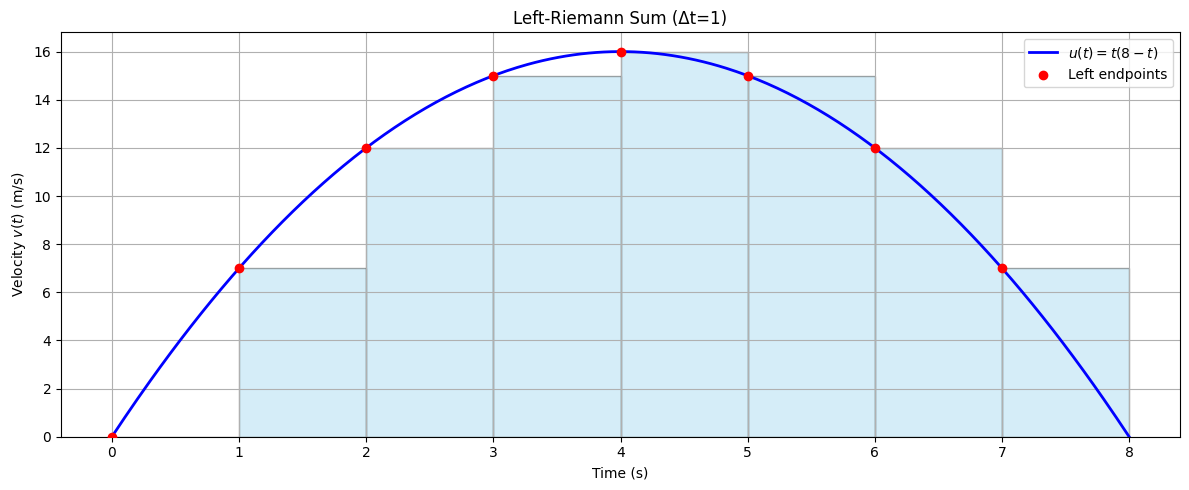

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def u(t):
    return t * (8 - t)

time_samples = np.array([0, 1, 4, 8])
u_samples = u(time_samples)

t_cont = np.linspace(0, 8, 400)
u_cont = u(t_cont)

#  Left-Riemann sum setup 
dt = 1
t_left = np.arange(0, 8, dt)   # left endpoints: 0,1,2,...,7
u_left = u(t_left)

# Compute left Riemann sum
areas = u_left * dt
total_left_riemann = np.sum(areas)

plt.figure(figsize=(12,5))


# plot continuous velocity curve
plt.plot(t_cont, u_cont, "b-", linewidth=2, label=r"$u(t) = t(8-t)$")

# plot left endpoints
plt.scatter(t_left, u_left, color="red", zorder=5, label="Left endpoints")

# draw rectangles
for i in range(len(t_left)):
    plt.bar(t_left[i], u_left[i], width=dt, align="edge",
            alpha=0.35, edgecolor="k", color="skyblue")

plt.title(f"Left-Riemann Sum (Δt=1)")
plt.xlabel("Time (s)")
plt.ylabel("Velocity $v(t)$ (m/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Riemann Sum

To compute distance given the  velocity graph aove, we can first use **Riemann sums**.  
We approximate the total distance by computing the **area of rectangles** under the curve.  

- The area of each rectangle is **base × height**.  
- The base is $(\Delta t = 1)$  ie (s).  
- The height is the velocity ie (m/s) at the **left endpoint** of each interval. 
**  Thus the area will give us meters  **

So, we can sum up the areas of all rectangles to get an approximation of the total distance traveled.



If we divide the interval into equal parts of width $(\Delta t)$, the **Riemann sum** is:

$$
S = \sum_{i=0}^{n-1} v(t_i)\Delta t
$$

where $(t_i)$ is the left endpoint of each interval.



### Example with $(\Delta t = 1)$

Here every change in time is $(\Delta t = 1)$.  
So the Riemann sum is:

$$
S = (v(0)\cdot 1 + v(1)\cdot 1 + v(2)\cdot 1 + v(3)\cdot 1 + v(4)\cdot 1 + v(5)\cdot 1 + v(6)\cdot 1 + v(7)\cdot 1)
$$

Substitute $(v(t) = t(8-t))$:

$$
S = (0 + 7 + 12 + 15 + 16 + 15 + 12 + 7) = 84
$$

So, the left Riemann sum approximation of the total distance is:

$$
\boxed{84 \text{ meters}}
$$

**Imagine if, instead of using a finite $(\Delta t = 1)$ second, we could measure the velocity at **every instant in time**. Then our rectangles would get smaller and smaller,  And the sum of their areas would converge to the exact distance traveled!! This is exactly what integration allows us to do.**

---

## Introducing the Integral

If we let the intervals become **infinitely small** ($\Delta t \to 0$), the Riemann sum **converges** to the exact total accumulation, which is written as an **integral**:

$$
\text{Accumulated quantity} = \int_a^b f(t) \, dt
$$

Where:  

- $\int$ is the **integration operator**,  
- $a$ and $b$ are the **lower and upper bounds** of the interval,  
- $f(t)$ is the function being accumulated,  
- $dt$ represents an **infinitesimally small change** in the independent variable.


### Applying to our car example

For the car’s velocity $v(t)$ from $t = 0$ to $t = 8$ s:

$$
v(t) = t(8-t)
$$

The **distance traveled** is:

$$
\text{Distance} = \int_0^8 v(t) \, dt
$$

- Using the **exact integral**, we get:

$$
\int_0^8 t(8-t) \, dt =  85.33 \text{ m}
$$


So, the true of the total distance is:

$$
\boxed{85.33 \text{ meters}}
$$


This shows how letting $\Delta t \to 0$ turns the **approximation into the true value**.


---


## Computing the Integral $ \int_0^8 t(8-t) \, dt $

To compute an integral  we **take the antiderivative** of the function and then compute the bounds (if stated).  



### Step 1: Expand the function

$$
t(8-t) = 8t - t^2
$$



### Step 2: Apply the Power Rule for Integration

Recall the **power rule**, from derivatives, the same rule applies integration but in reverse:

$$
\int t^n \, dt = \frac{t^{n+1}}{n+1} + C, \quad n \neq -1
$$

Apply it to each term:

$$
\int (8t - t^2) \, dt = 4t^2 - \frac{t^3}{3} + C
$$

This is the **antiderivative** $F(t)$.



### Step 3: Evaluate at the Bounds (Fundamental Theorem of Calculus)

The **Fundamental Theorem of Calculus** says:

$$
\int_a^b f(t)\, dt = F(b) - F(a)
$$


$$
F(t) = 4 t^2 - \frac{t^3}{3}, \quad a=0, b=8
$$
 
Compute:

$$
\int_0^8 (8t - t^2) \, dt = F(8) - F(0) = \left(256 - \frac{512}{3}\right) - 0 = \frac{256}{3} = 85.33 
$$




The **Fundamental Theorem of Calculus** is key to understanding derivatives and antiderivatives!  

- In our example, $F(t) = 4t^2 - \frac{t^3}{3}$ also represents the **path function**, commonly written as $x(t)$ in physics or calculus.  
- Recall from derivatives: 

$$
\frac{dx}{dt} = v(t)
$$

which says the derivative of the path gives the **velocity**.  

- Here, we went in the opposite direction: **starting from velocity $v(t)$**, we computed the **integral** to recover the **path $x(t)$**.  

In other words:

- **Derivative:** path $\to$ velocity  
- **Integral:** velocity $\to$ path  

This shows how **integration accumulates small changes in velocity** over time to give the **total displacement**, just like summing the tiny rectangles in a Riemann sum.  

Thus, **derivatives and integrals are inverse operations**, and the Fundamental Theorem of Calculus makes this connection precise.  

- Derivative: $v(t) = \frac{dx}{dt}$  
- Integral: $x(b) - x(a) = \int_a^b v(t) \, dt$



---

## Common Integration Formulas

Here is a list of commonly used integrals and rules for reference:


### 1. Power Rule
For $n \neq -1$:

$$
\int x^n \, dx = \frac{x^{n+1}}{n+1} + C
$$

---

### 2. Exponential Functions
$$
\int e^x \, dx = e^x + C
$$

$$
\int a^x \, dx = \frac{a^x}{\ln(a)} + C, \quad a > 0, a \neq 1
$$

---

### 3. Logarithmic Function
$$
\int \frac{1}{x} \, dx = \ln|x| + C
$$

---

### 4. Sine and Cosine
$$
\int \sin(x) \, dx = -\cos(x) + C
$$

$$
\int \cos(x) \, dx = \sin(x) + C
$$

---
### 5. Other Trigonometric Functions

$$
\int \sec^2(x) \, dx = \tan(x) + C
$$

$$
\int \csc^2(x) \, dx = -\cot(x) + C
$$

$$
\int \sec(x)\tan(x) \, dx = \sec(x) + C
$$

$$
\int \csc(x)\cot(x) \, dx = -\csc(x) + C
$$

---

### 6. Linear Combination Rule
If $f(x)$ and $g(x)$ are integrable and $a,b$ are constants:

$$
\int \big(a f(x) + b g(x)\big) \, dx = a \int f(x)\,dx + b \int g(x)\,dx
$$

---

### 7. Integration by Substitution (u-substitution)
Used for composite functions:

$$
\int f(g(x)) g'(x)\, dx = \int f(u)\, du, \quad u = g(x)
$$

Example:

$$
\int \sin(3x) \, dx = -\frac{1}{3} \cos(3x) + C
$$


---
### 8. Inverse Trigonometric Functions

$$
\int \frac{1}{\sqrt{1-x^2}} \, dx = \arcsin(x) + C
$$

$$
\int \frac{1}{1+x^2} \, dx = \arctan(x) + C
$$

$$
\int \frac{1}{x\sqrt{x^2-1}} \, dx = \operatorname{arcsec}(|x|) + C
$$


---

### 9. Hyperbolic Functions
$$
\int \sinh(x) \, dx = \cosh(x) + C
$$

$$
\int \cosh(x) \, dx = \sinh(x) + C
$$

---

### 10. Special Rules / Tricks
- **Constant Multiple Rule**: $\int a f(x)\, dx = a \int f(x)\, dx$  
- **Sum/Difference Rule**: $\int (f(x) \pm g(x)) \, dx = \int f(x) dx \pm \int g(x) dx$  


---



## What if a function is made up of two factors?  **Integration by Parts**

The **integration by parts formula** states that for functions $u(x)$ and $v(x)$ that are differentiable:

$$
\int u(x) v'(x) \, dx = u(x)v(x) - \int u'(x) v(x) \, dx
$$

- $u(x)$: function we differentiate  
- $v'(x)$: function we integrate  



### Example: Integrate $f(x) = x \sin(kx)$

Suppose we want to compute:

$$
\int x \sin(kx) \, dx
$$

1. **Choose parts**:

- Let $u(x) = x \quad \Rightarrow \quad u'(x) = 1$  
- Let $v'(x) = \sin(kx) \quad \Rightarrow \quad v(x) = -\frac{1}{k} \cos(kx)$

2. **Apply the formula**:

$$
\int x \sin(kx) \, dx = u(x)v(x) - \int u'(x) v(x) \, dx
$$

Substitute:

$$
\left( x \cdot -\frac{1}{k} \cos(kx) \right) - \int 1 \cdot \left( -\frac{1}{k} \cos(kx) \right) dx
$$

Simplify:

$$
-\frac{x}{k} \cos(kx) + \frac{1}{k} \int \cos(kx) \, dx
$$

3. **Integrate remaining term**:

$$
\int \cos(kx) \, dx = \frac{1}{k} \sin(kx)
$$

So the final result:

$$
-\frac{x}{k} \cos(kx) + \frac{1}{k^2} \sin(kx) + C
$$

~remaining time will be a problem set~